[**DATA PREPARATION**](#1)

   1. [Import Library](#import_library)

   2. [Read the data](#read_dataset)

[**DATA CLEANING**](#2)

   1. [Handling Outlier](#handling_outlier)
   
   2. [Handling Missing Value](#handling_missing_values)
   
   3. [Encode Categorical Data](#encode_categorical_data)
   
   4. [Feature Selection](#feature_selection)
   
   5. [Feature Scaling](#feature_scaling)
   
[**EXPLORATORY DATA ANALYSIS**](#3)

   1. [Univariate Analysis](#univariate_analysis)
   
   2. [Bivariate Analysis](#bivariate_analysis)

[**BUILDING MODEL & HYPER-PARAMETER TUNING**](#4)

   1. [Modeling](#modeling)
   
   2. [Cross Validation](#cross_validation)
   
   3. [Hyper-Parameter Tuning](#hyper_parameter_tuning)

[**MODEL EVALUATION & IMPLEMENTATION**](#5)

   1. [Comparing Model Report](#comparing_model_report)
   
   2. [Comparing with ROC](#comparing_with_roc)
   
   3. [Acceptance Rates](#acceptance_rates)
   
   4. [Bad Rates](#bad_rates)
   
   5. [Expected Loss](#expected_loss)

### DATA PREPARATION
<a id="#1" > </a>

**1. Import Library**
<a id="import_library" > </a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.ensemble import ExtraTreesClassifier

**2. Read Dataset**
<a id="read_dataset" > </a>

In [2]:
df = pd.read_csv('credit_risk_dataset.csv')

In [3]:
# Menampilkan 5 data teratas
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [4]:
# Menampilkan informasi dari dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32580 entries, 0 to 32579
Data columns (total 12 columns):
person_age                    32580 non-null int64
person_income                 32580 non-null int64
person_home_ownership         32580 non-null object
person_emp_length             32580 non-null float64
loan_intent                   32580 non-null object
loan_grade                    32580 non-null object
loan_amnt                     32580 non-null int64
loan_int_rate                 29464 non-null float64
loan_status                   32580 non-null int64
loan_percent_income           32580 non-null float64
cb_person_default_on_file     32580 non-null object
cb_person_cred_hist_length    32580 non-null int64
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [5]:
# Menampilkan statistik deskriptif dari dataset
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32580.000000,3.258000e+04,32580.000000,32580.000000,29464.000000,32580.000000,32580.000000,32580.000000
mean,27.731031,6.589271e+04,4.767772,9589.511971,11.011637,0.218171,0.170209,5.803622
std,6.315410,5.254702e+04,4.087238,6322.132541,3.240499,0.413010,0.106779,4.053669
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,2.039784e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


### DATA CLEANING & PREPROCESSING
<a id="#2" > </a>

**1. Handling Outlier**
<a id="handling_outlier" > </a>

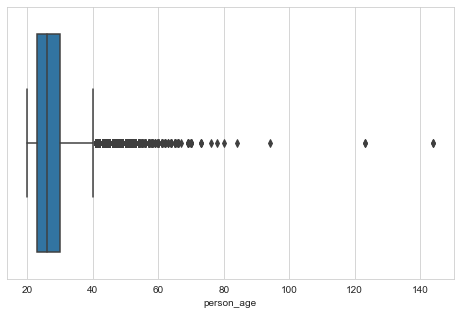

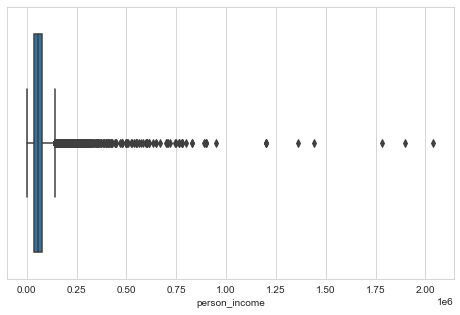

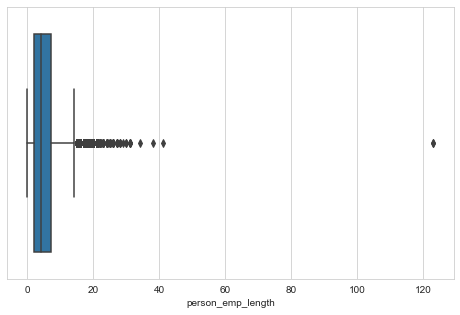

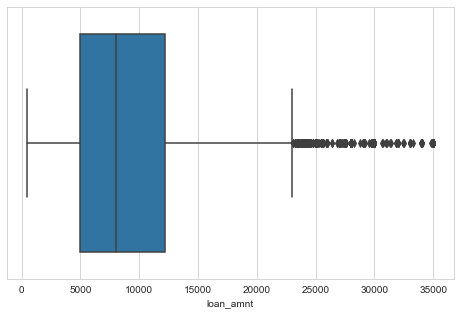

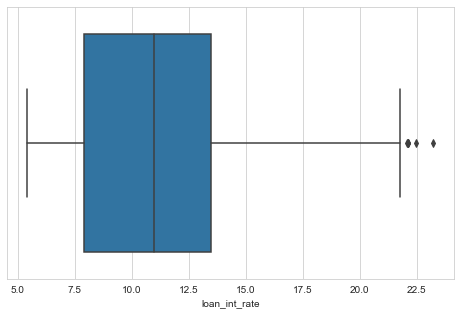

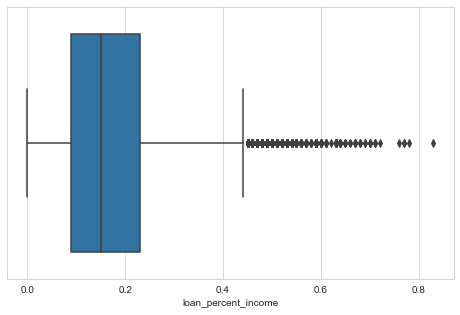

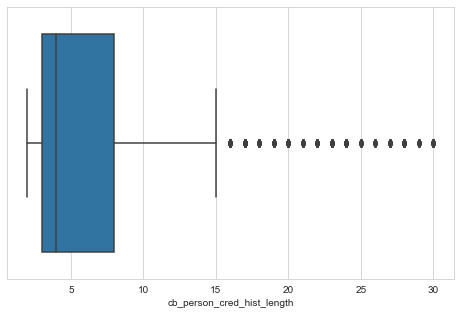

In [6]:
# Cek outlier menggunakan boxplot
columns = df.select_dtypes(exclude=['object'])
columns = columns.drop(['loan_status'], axis=1)
for i in columns:
    plt.figure(figsize=(8,5))
    sns.boxplot(columns[i])

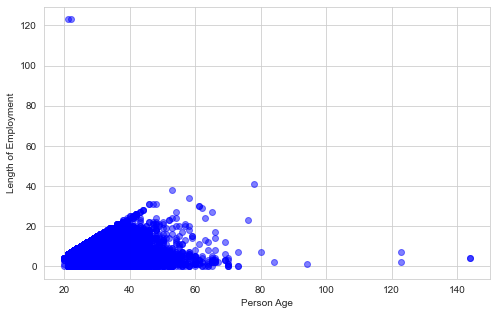

In [7]:
# Cek outlier pada feature person_age dan person_emp_length menggunakan scatterplot
plt.figure(figsize=(8,5))
plt.scatter(df['person_age'], df['person_emp_length'], c='blue', alpha=0.5)
plt.xlabel('Person Age')
plt.ylabel('Length of Employment')
plt.show()

Dilihat dari scatterplot diatas terdapat adanya outlier, karena ada data yang berumur 21 tahun tapi **length of employmentnya** lebih dari 120 tahun. Selain itu, ada data yang berumur 144 tahun.

In [8]:
# Data outlier person_age yang lebih dari 100 tahun
df[df['person_age']>=100]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
81,144,250000,RENT,4.0,VENTURE,C,4800,13.57,0,0.02,N,3
183,144,200000,MORTGAGE,4.0,EDUCATION,B,6000,11.86,0,0.03,N,2
575,123,80004,RENT,2.0,EDUCATION,B,20400,10.25,0,0.25,N,3
747,123,78000,RENT,7.0,VENTURE,B,20000,NaN,0,0.26,N,4


In [9]:
# Data outlier person_emp_length yang lebih dari 100 tahun
df[df['person_emp_length']>=100]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
210,21,192000,MORTGAGE,123.0,VENTURE,A,20000,6.54,0,0.10,N,4


In [10]:
# Jumlah data outlier pada feature person_age
age_outlier = df[df['person_age']>=100]['person_age']
age_outlier.value_counts().sum()

4

In [11]:
# Jumlah data outlier pada feature person_emp_length
age_outlier = df[df['person_emp_length']>=100]['person_emp_length']
age_outlier.value_counts().sum()

2

Karena jumlah outliernya hanya sedikit dari jumlah kesulurahan data, jadi opsi yang saya lakukan adalah drop.

In [12]:
# Drop outlier pada feature person_age
df = df.drop(df[df['person_age'] >= 100].index)

# Drop outlier pada feature person_emp_length
df = df.drop(df[df['person_emp_length'] >= 100].index)

**2. Handling Missing Values**
<a id="handling_missing_values" > </a>

In [13]:
# Cek missing value
df.isna().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length                0
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3115
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

Missing value pada feature **loan interest rate** diisi menggunakan mean dari masing-masing grade pada feature **loan grade**, karena semakin baik nilai loan grade (A > B > C > D > E > F > G) maka akan semakin kecil interest rate-nya. Bisa dilihat pada pivot table dibawah ini:

In [14]:
# Membuat pivot table feature loan_grade dengan nilai mean loan_int_rate
table = pd.pivot_table(df, index=['loan_grade'], values=['loan_int_rate'], aggfunc='mean')
table['loan_int_rate'] = table['loan_int_rate'].round(decimals=2)
table

,loan_int_rate
loan_grade,
A,7.33
B,11.00
C,13.46
D,15.36
E,17.01
F,18.61
G,20.25


In [15]:
# Fill missing value
df['loan_int_rate'] = df['loan_int_rate'].mask(df['loan_grade'] == 'A', df['loan_int_rate'].fillna(7.33))
df['loan_int_rate'] = df['loan_int_rate'].mask(df['loan_grade'] == 'B', df['loan_int_rate'].fillna(11.00))
df['loan_int_rate'] = df['loan_int_rate'].mask(df['loan_grade'] == 'C', df['loan_int_rate'].fillna(13.46))
df['loan_int_rate'] = df['loan_int_rate'].mask(df['loan_grade'] == 'D', df['loan_int_rate'].fillna(15.36))
df['loan_int_rate'] = df['loan_int_rate'].mask(df['loan_grade'] == 'E', df['loan_int_rate'].fillna(17.01))
df['loan_int_rate'] = df['loan_int_rate'].mask(df['loan_grade'] == 'F', df['loan_int_rate'].fillna(18.26))
df['loan_int_rate'] = df['loan_int_rate'].mask(df['loan_grade'] == 'G', df['loan_int_rate'].fillna(20.25))

**3. Encode Categorical Data**
<a id="encode_categorical_data" > </a>

Karena sebagian besar feature berupa categorical, maka dari itu feature yang berupa categorical tersebut harus diubah terlebih dahulu menjadi numerical agar bisa diproses oleh machine learning.

In [16]:
# Memisahkan columns numerical dengan columns categorical
df_num = df.select_dtypes(exclude=['object'])
df_cat = df.select_dtypes(include=['object'])

In [17]:
# One-hot encoding pada columns categorical 
df_cat_onehot = pd.get_dummies(df_cat)

In [18]:
# Concatenate
df_clean = pd.concat([df_num, df_cat_onehot], axis=1)

In [19]:
# Menampilkan data teratas
df_clean.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,...,loan_intent_VENTURE,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_N,cb_person_default_on_file_Y
1,21,9600,5.0,1000,11.14,0,0.10,2,0,0,...,0,0,1,0,0,0,0,0,1,0
2,25,9600,1.0,5500,12.87,1,0.57,3,1,0,...,0,0,0,1,0,0,0,0,1,0
3,23,65500,4.0,35000,15.23,1,0.53,2,0,0,...,0,0,0,1,0,0,0,0,1,0
4,24,54400,8.0,35000,14.27,1,0.55,4,0,0,...,0,0,0,1,0,0,0,0,0,1
5,21,9900,2.0,2500,7.14,1,0.25,2,0,0,...,1,1,0,0,0,0,0,0,1,0


In [20]:
# Menampilkan informasi dari dataset
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32574 entries, 1 to 32579
Data columns (total 27 columns):
person_age                        32574 non-null int64
person_income                     32574 non-null int64
person_emp_length                 32574 non-null float64
loan_amnt                         32574 non-null int64
loan_int_rate                     32574 non-null float64
loan_status                       32574 non-null int64
loan_percent_income               32574 non-null float64
cb_person_cred_hist_length        32574 non-null int64
person_home_ownership_MORTGAGE    32574 non-null uint8
person_home_ownership_OTHER       32574 non-null uint8
person_home_ownership_OWN         32574 non-null uint8
person_home_ownership_RENT        32574 non-null uint8
loan_intent_DEBTCONSOLIDATION     32574 non-null uint8
loan_intent_EDUCATION             32574 non-null uint8
loan_intent_HOMEIMPROVEMENT       32574 non-null uint8
loan_intent_MEDICAL               32574 non-null uint8
loan_

**4. Feature Selection**
<a id="feature_selection" > </a>

In [21]:
X = df_clean.drop(['loan_status'], axis=1)
y = df_clean['loan_status']

* **Feature selection using SelectKBest**

In [22]:
# Apply SelectKBest class to extract top 5 best features
bestfeatures = SelectKBest(score_func=chi2, k=5)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

# Concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  # Naming the dataframe columns
print(featureScores.nlargest(5,'Score'))  # Print 10 best features

            Specs         Score
1   person_income  3.873329e+07
3       loan_amnt  1.503011e+06
4   loan_int_rate  3.411030e+03
20   loan_grade_D  2.943448e+03
21   loan_grade_E  1.025643e+03


* **Feature Selection using ExtraTreeClassifier**

[0.06082058 0.11238528 0.07514565 0.0868267  0.0902056  0.21792188
 0.05054849 0.01968146 0.00087568 0.01247282 0.03917375 0.02321524
 0.00943716 0.00966688 0.02033961 0.00779778 0.00854378 0.01349413
 0.00890961 0.02256347 0.06551508 0.02196584 0.0062527  0.0037619
 0.00694134 0.00553757]


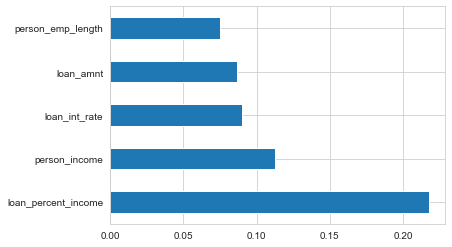

In [23]:
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) # Use inbuilt class feature_importances of tree based classifiers

# Plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

**5. Feature Scaling**
<a id="feature_scaling" > </a>

* **Feature Scaling using Standard Scaler**

In [24]:
standard = StandardScaler()
df_scl = standard.fit_transform(X)

In [25]:
df_scl = df_clean.drop(['loan_status'], axis=1)
df_scl.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,...,loan_intent_VENTURE,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_N,cb_person_default_on_file_Y
1,21,9600,5.0,1000,11.14,0.10,2,0,0,1,...,0,0,1,0,0,0,0,0,1,0
2,25,9600,1.0,5500,12.87,0.57,3,1,0,0,...,0,0,0,1,0,0,0,0,1,0
3,23,65500,4.0,35000,15.23,0.53,2,0,0,0,...,0,0,0,1,0,0,0,0,1,0
4,24,54400,8.0,35000,14.27,0.55,4,0,0,0,...,0,0,0,1,0,0,0,0,0,1
5,21,9900,2.0,2500,7.14,0.25,2,0,0,1,...,1,1,0,0,0,0,0,0,1,0


* **Feature Scaling using Robust Scaler**

In [26]:
robust = RobustScaler()
df_robust = robust.fit_transform(X)

In [27]:
df_robust = df_clean.drop(['loan_status'], axis=1)
df_robust.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,...,loan_intent_VENTURE,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_N,cb_person_default_on_file_Y
1,21,9600,5.0,1000,11.14,0.10,2,0,0,1,...,0,0,1,0,0,0,0,0,1,0
2,25,9600,1.0,5500,12.87,0.57,3,1,0,0,...,0,0,0,1,0,0,0,0,1,0
3,23,65500,4.0,35000,15.23,0.53,2,0,0,0,...,0,0,0,1,0,0,0,0,1,0
4,24,54400,8.0,35000,14.27,0.55,4,0,0,0,...,0,0,0,1,0,0,0,0,0,1
5,21,9900,2.0,2500,7.14,0.25,2,0,0,1,...,1,1,0,0,0,0,0,0,1,0


### EXPLORATORY DATA ANALYSIS (EDA)
<a id="#3" > </a>

Saya menggunakan 2 cara dalam melakukan EDA, yaitu:
    1. Univariate Analysis untuk memahami masing-masing feature berdasarkan loan_status.
    2. Bivariate Analysis untuk mengetahui korelasi antara dua feature berdasarkan loan_status.

**1. UNIVARIATE ANALYSIS**
<a id="univariate_analysis" > </a>

Text(0.5, 1.0, 'Loan Status History')

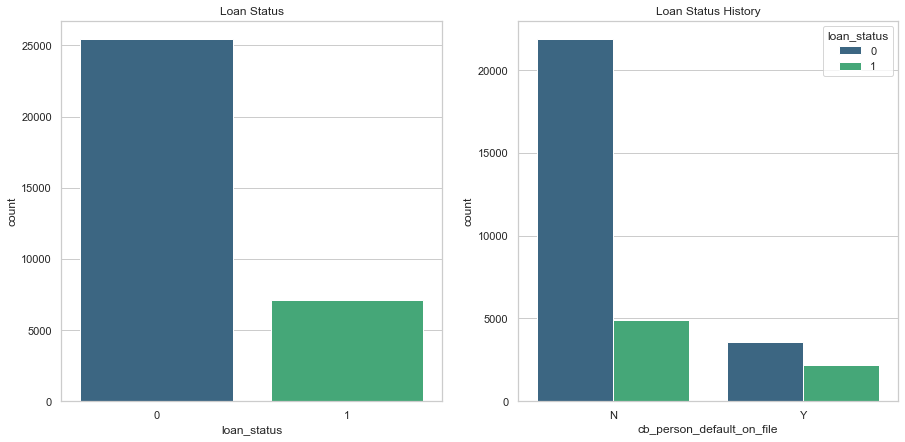

In [28]:
# Create custom figure
sns.set(font_scale=1)
sns.set_style('whitegrid')
plt.figure(figsize = (15,7))

# Visualisasi feature loan_status menggunakan countplot
plt.subplot(1,2,1)
sns.countplot(x='loan_status', palette='viridis', data=df)
plt.title('Loan Status')

# Visualisasi feature cb_person_default_on_file menggunakan countplot
plt.subplot(1,2,2)
sns.countplot(x='cb_person_default_on_file', hue='loan_status', palette='viridis', data=df)
plt.title('Loan Status History')

In [29]:
# Membuat cross table loan_status dan cb_person_default_on_file
print(pd.crosstab(df['cb_person_default_on_file'], df['loan_status'], margins = True))

loan_status                    0     1    All
cb_person_default_on_file                    
N                          21894  4936  26830
Y                           3573  2171   5744
All                        25467  7107  32574


#### Kesimpulan:
Debitur yang status creditnya **default** pada pinjaman sebelumnya memiliki **probability of default** pada pinjaman selanjutnya.

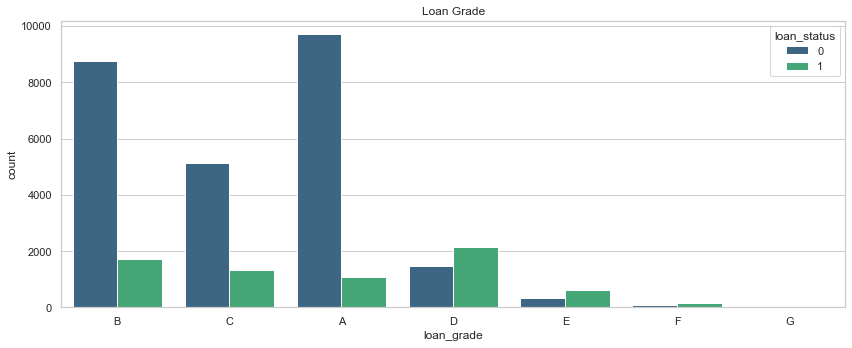

In [30]:
# Visualisasi feature loan_grade menggunakan countplot
plt.figure(figsize=(12,5))
plt.title('Loan Grade')
sns.countplot(x='loan_grade', hue='loan_status', palette='viridis', data=df)
plt.tight_layout()

In [31]:
# Membuat cross table loan_grade and loan_status
print(pd.crosstab(df['loan_grade'], df['loan_status'], margins = True))

loan_status      0     1    All
loan_grade                     
A             9703  1073  10776
B             8747  1701  10448
C             5117  1339   6456
D             1485  2140   3625
E              343   621    964
F               71   170    241
G                1    63     64
All          25467  7107  32574


**Kesimpulan:**

Debitur yang memiliki loan grade A, B, C memiliki **probability of default** yang lebih rendah dibandingkan yang memiliki loan grade D, E, F, G.

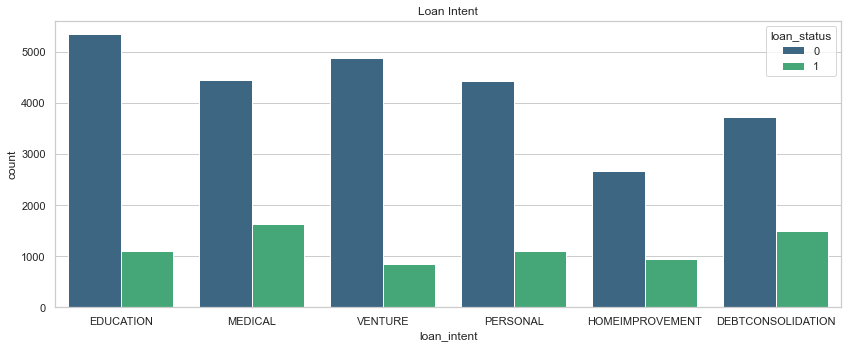

In [32]:
# Visualisasi feature loan_intent menggunakan countplot
plt.figure(figsize=(12,5))
plt.title('Loan Intent')
sns.countplot(x='loan_intent', hue='loan_status', palette='viridis', data=df)
plt.tight_layout()

In [33]:
# Membuat cross table loan_intent dan loan_status
print(pd.crosstab(df['loan_intent'], df['loan_status'], margins = True))

loan_status            0     1    All
loan_intent                          
DEBTCONSOLIDATION   3722  1490   5212
EDUCATION           5340  1111   6451
HOMEIMPROVEMENT     2664   941   3605
MEDICAL             4450  1621   6071
PERSONAL            4422  1097   5519
VENTURE             4869   847   5716
All                25467  7107  32574


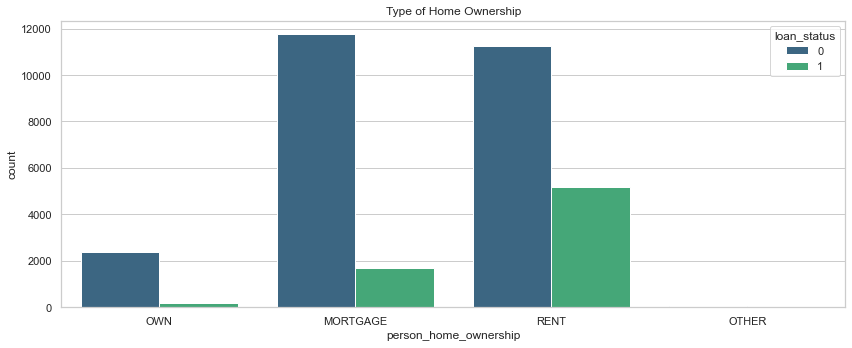

In [34]:
# Visualisasi feature person_home_ownership menggunakan countplot
plt.figure(figsize=(12,5))
plt.title('Type of Home Ownership')
sns.countplot(x='person_home_ownership', hue='loan_status', palette='viridis', data=df)
plt.tight_layout()

In [35]:
# Membuat cross table person_home_ownership dan loan_status
print(pd.crosstab(df['person_home_ownership'], df['loan_status'], margins = True))

loan_status                0     1    All
person_home_ownership                    
MORTGAGE               11751  1690  13441
OTHER                     74    33    107
OWN                     2391   193   2584
RENT                   11251  5191  16442
All                    25467  7107  32574


**2. BIVARIATE ANALYSIS**
<a id="bivariate_analysis" > </a>

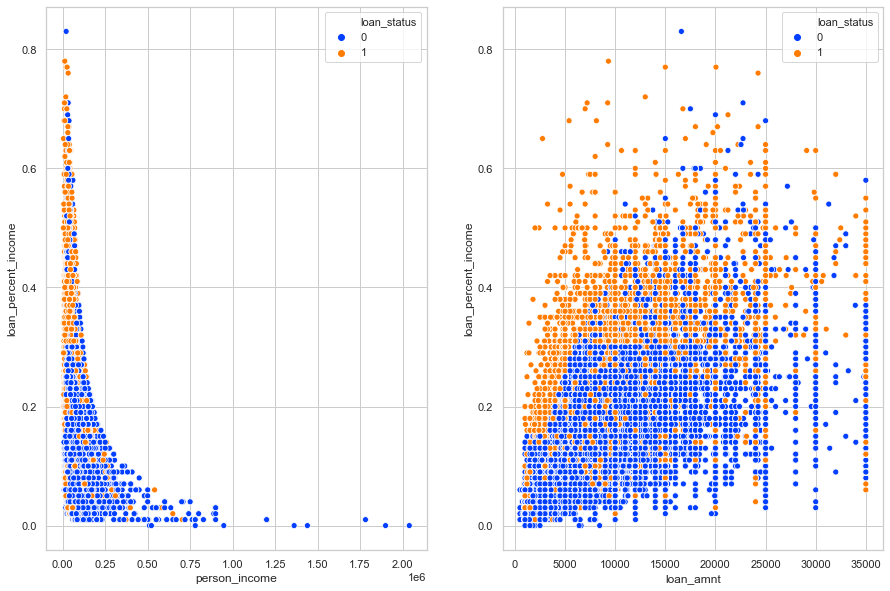

In [38]:
# Membuat custom figure
sns.set(font_scale=1)
plt.figure(figsize = (15,10))
sns.set_style('whitegrid')

# Visualisasi feature person_income dengan loan_percent_income untuk melihat korelasi 
plt.subplot(1,2,1)
sns.scatterplot(x='person_income', y='loan_percent_income', palette='bright',
                hue='loan_status', data=df)
# Visualisasi feature loan_amnt dengan loan_percent_income untuk melihat korelasi
plt.subplot(1,2,2)
sns.scatterplot(x='loan_amnt', y='loan_percent_income', palette='bright',
                hue='loan_status', data=df)

#### Kesimpulan:
* Semakin rendah **person income** semakin tinggi **loan percent income**.
* Semakin tinggi **loan amount** semakin tinggi **loan percent income**.
* Debitur yang memiliki **loan percent income** tinggi memiliki **probability of default** yang tinggi juga. 

    Cara perhitungan **loan percent income** adalah:
    > **loan amount** / **person income**

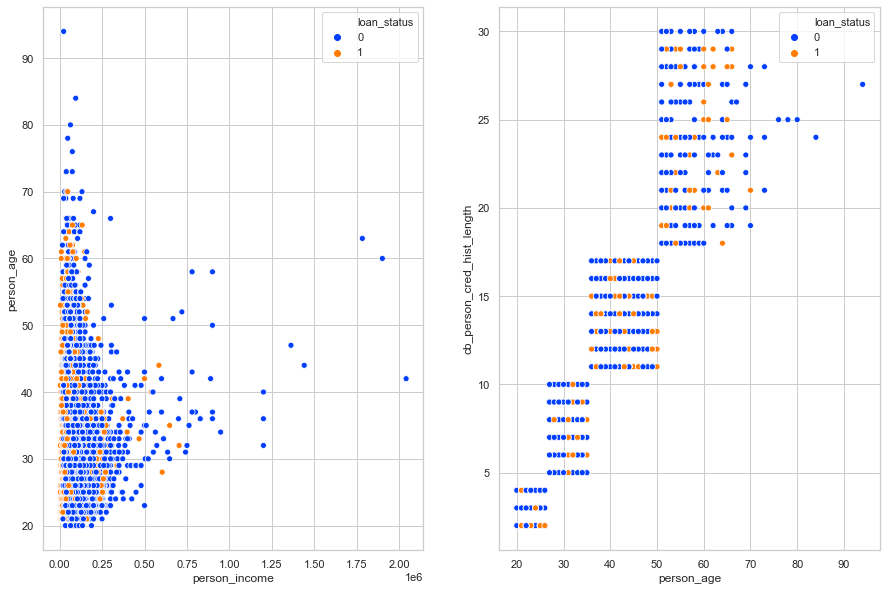

In [39]:
# Membuat custom figure
sns.set(font_scale=1)
plt.figure(figsize = (15,10))
sns.set_style('whitegrid')

# Visualisasi feature person_income dengan person_age untuk melihat korelasi 
plt.subplot(1,2,1)
sns.scatterplot(x='person_income', y='person_age', hue='loan_status',
                palette='bright', data=df)

# Visualisasi feature person_age dengan cb_person_cred_hist_length untuk melihat korelasi 
plt.subplot(1,2,2)
sns.scatterplot(x='person_age', y='cb_person_cred_hist_length', palette='bright',
                hue='loan_status', data=df)

#### Kesimpulan:

   * Peningkatan **age** diiringi dengan peningkatan **income**. Hal ini wajar karena seiring dengan perjalanan karir incomenya akan meningkat.  
   * Peningkatan **age** diiringi dengan peningkatan **credit history length**.

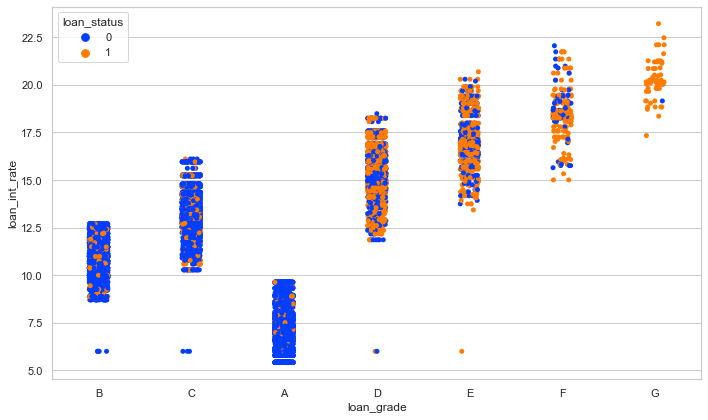

In [40]:
# Visualisasi feature loan_grade dengan loan_int_rate menggunakan stripplot
plt.figure(figsize=(10,6))
sns.stripplot(x='loan_grade', y='loan_int_rate', hue='loan_status', palette='bright', data=df)
plt.tight_layout()
plt.savefig('fii.png')

#### Kesimpulan:

   * Semakin baik **loan grade** semakin rendah **loan interest rate**-nya, karena dari segi resiko debitur yang memiliki grade baik (A, B, dan C) semakin rendah **probability of defaultnya** dibandingkan debitur yang memiliki grade (D, E, F, dan G).
   * Debitur yang memiliki **loan interest rate** tinggi semakin tinggi juga **probability of defaultnya**.

### MODEL BUILDING & HYPER-PARAMETER TUNING

Outcome dari model machine learning yang saya buat adalah untuk memprediksi apakah suatu pinjaman memiliki resiko **default** atau **non-default**.

* Probability default antara 0 dan 1 (0 = non default, 1 = default) 


 Probability of Default |     Interpretation       | Predicted Loan Status
 -----------------------| -----------------------  |----------------------
0.4                     | Unlikely to default      | 0
0.9                     | Very likely to default   | 1
0.1                     | Very unlikely to default | 0

**1. Modeling**
<a id="modeling" > </a>

In [41]:
X = df_clean
y = df_clean['loan_status']

Saya akan menggunakan 2 algoritma ML, yaitu:
    1. Logistic Regression
    2. XGBoost

In [42]:
# Load Library
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score, precision_recall_fscore_support
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.calibration import calibration_curve
import warnings
warnings.filterwarnings("ignore")

**LOGISTIC REGRESSION**

In [43]:
# Create X and y data for the model use result of feature selection with ExtraTreeClassifier
X = df_clean[['loan_percent_income','person_income','loan_int_rate','loan_amnt','person_emp_length']]
y = df_clean['loan_status']

# Use test_train_split to create the training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

# Create and train a new logistic regression
log_reg = LogisticRegression().fit(X_train, y_train)

# Print the intercept of the model
print(log_reg.intercept_)

# Print the coeficient of the model
print(log_reg.coef_)

[-1.94530645e-09]
[[ 2.67963667e-09 -4.12701078e-05  9.75995839e-08  1.09127973e-04
  -2.29757337e-08]]


In [44]:
# Create predictions of probability for loan status using test data
lr_preds = log_reg.predict_proba(X_test)

# Create dataframes of first ten predictions, and first ten true labels
lr_preds_df = pd.DataFrame(lr_preds[:,1][:10], columns = ['prob_default'])
lr_true_df = y_test.head(10)

# Concatenate and print the two data frames for comparison
print(pd.concat([lr_true_df.reset_index(drop = True), lr_preds_df], axis = 1))

   loan_status  prob_default
0            0      0.313930
1            0      0.000657
2            0      0.243339
3            0      0.432167
4            0      0.220640
5            0      0.395772
6            0      0.264517
7            0      0.318181
8            0      0.142722
9            1      0.439584


**Kesimpulan:**

Berdasarkan hasil comparison diatas ada yang probability of defaultnya 0.43 tapi aktualnya adalah 0 (non-default) ada juga yang aktualnya 1 (default). Oleh karena itu, saya coba menentukan treshold di titik mana suatu prediksi termasuk non-default atau default lalu dicompare ulang dengan menggunakan confusion matrix dan classification report.

* **Treshold = 0.5**

    Apabila hasil predict_proba > 0.5 maka termasuk **default**.

In [45]:
# Create a dataframe for the probabilities of default
lr_preds_df = pd.DataFrame(lr_preds[:,1], columns = ['prob_default'])

# Reassign loan status based on the threshold
lr_preds_df['loan_status'] = lr_preds_df['prob_default'].apply(lambda x: 1 if x > 0.5 else 0)

# Print the confusion matrix
print('\n' + '\033[1m' + ' Confusion Matrix '.center(60,'-') + '\033[0m' + '\n')
print(confusion_matrix(y_test, lr_preds_df['loan_status']))

# Print the classification report
target_names = ['Non-Default', 'Default']
print('\n' + '\033[1m' + ' Classification Report '.center(60,'-') + '\033[0m' + '\n')
print(classification_report(y_test, lr_preds_df['loan_status'], target_names=target_names))


--------------------- Confusion Matrix ---------------------

[[7473  146]
 [1788  366]]

------------------ Classification Report -------------------

              precision    recall  f1-score   support

 Non-Default       0.81      0.98      0.89      7619
     Default       0.71      0.17      0.27      2154

    accuracy                           0.80      9773
   macro avg       0.76      0.58      0.58      9773
weighted avg       0.79      0.80      0.75      9773



**Kesimpulan:**

Hasil dari recall default hanya 0.17, artinya hasil prediksi default dari model yang saya buat hanya 17% benar dari seluruh yang actualnya default. Maka dari itu saya coba untuk menurunkan treshold menjadi 0.4 untuk melihat apakah ada peningkatan recall default. 

* **Treshold = 0.4**

    Apabila hasil predict_proba > 0.4 maka termasuk **default**.

In [46]:
# Create a dataframe for the probabilities of default
lr_preds_df = pd.DataFrame(lr_preds[:,1], columns = ['prob_default'])

# Reassign loan status based on the threshold
lr_preds_df['loan_status'] = lr_preds_df['prob_default'].apply(lambda x: 1 if x > 0.4 else 0)

# Print the confusion matrix
print('\n' + '\033[1m' + ' Confusion Matrix '.center(60,'-') + '\033[0m' + '\n')
print(confusion_matrix(y_test, lr_preds_df['loan_status']))

# Print the classification report
target_names = ['Non-Default', 'Default']
print('\n' + '\033[1m' + ' Classification Report '.center(60,'-') + '\033[0m' + '\n')
print(classification_report(y_test, lr_preds_df['loan_status'], target_names=target_names))


--------------------- Confusion Matrix ---------------------

[[7031  588]
 [1175  979]]

------------------ Classification Report -------------------

              precision    recall  f1-score   support

 Non-Default       0.86      0.92      0.89      7619
     Default       0.62      0.45      0.53      2154

    accuracy                           0.82      9773
   macro avg       0.74      0.69      0.71      9773
weighted avg       0.81      0.82      0.81      9773



**Kesimpulan:**

Terdapat peningkatan recall default dari 0.17 ke 0.46. 

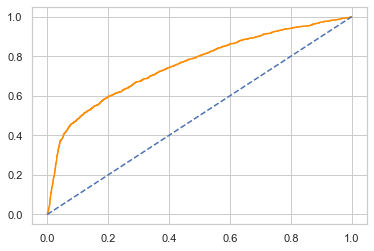

Accuracy Score: 0.8021078481530748
AUC Score: 0.7563946082114268


In [47]:
# Plot the ROC curve of the probabilities of default
lr_prob_default = lr_preds[:,1]
fallout, sensitivity, thresholds = roc_curve(y_test, lr_prob_default)
plt.plot(fallout, sensitivity, color = 'darkorange')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.show()

# Print the accuracy score the model
lr_acc_score = log_reg.score(X_test, y_test)
print('Accuracy Score: ' + str(lr_acc_score))

# Compute the AUC and store it in a variable
lr_auc_score = roc_auc_score(y_test, lr_prob_default)
print('AUC Score: ' + str(lr_auc_score))

**A. Default Recall Impact**

Menghitung **unexpected loss** berdasarkan **default recall**.

* **Treshold = 0.4**

In [48]:
# Print the confusion matrix
print('\n' + '\033[1m' + ' Confusion Matrix '.center(60,'-') + '\033[0m' + '\n')
print(confusion_matrix(y_test, lr_preds_df['loan_status']))

# Print the classification report
target_names = ['Non-Default', 'Default']
print('\n' + '\033[1m' + ' Classification Report '.center(60,'-') + '\033[0m' + '\n')
print(classification_report(y_test, lr_preds_df['loan_status'], target_names=target_names))

# Print average loan amount
print('\n' + '\033[1m' + ' Average Loan Amount '.center(60,'-') + '\033[0m' + '\n')
print(df_clean['loan_amnt'].mean())


--------------------- Confusion Matrix ---------------------

[[7031  588]
 [1175  979]]

------------------ Classification Report -------------------

              precision    recall  f1-score   support

 Non-Default       0.86      0.92      0.89      7619
     Default       0.62      0.45      0.53      2154

    accuracy                           0.82      9773
   macro avg       0.74      0.69      0.71      9773
weighted avg       0.81      0.82      0.81      9773


------------------- Average Loan Amount --------------------

9588.018051206484


Dari hasil confusion matrix dan classification report di atas diketahui:

- Number True of Default = **2154** (Hasil dari TP + FN)

- Recall Default = **45%** (Hasil dari TP / (TP + FN))

- Not Predicted = **55%** 

Loan Amount | Default Predicted / Not Predicted| Estimated Loss on Default
------------|----------------------------------|----------------------------
$ 9588      |       0.45/0.55                  | (2154 x 0.55) x 9588   
                                               
                                                                                  $11.358.903

* **Treshold = 0.5**

In [49]:
# Average loan amount
avg_loan_amnt = df_clean['loan_amnt'].mean() 

# Reassign the values of loan status based on the new threshold
lr_preds_df['loan_status'] = lr_preds_df['prob_default'].apply(lambda x: 1 if x > 0.5 else 0)

# Store the number of actual loan defaults 
num_defaults = y_test.value_counts()[1]

# Store the default recall from the classification report
default_recall = precision_recall_fscore_support(y_test, lr_preds_df['loan_status'])[1][1]

# Calculate the estimated impact of the new default recall rate
print(num_defaults * avg_loan_amnt * (1 - default_recall))

17143376.27555719


In [50]:
# Selisih antara treshold 0.5 dengan treshold 0.4
11358903 - 17143376 

-5784473

**Kesimpulan:**

Terdapat perbedaan yang signifikan antara treshold 0.5 dan treshold 0.4. Hal ini sangat penting untuk meningkatkan recall default agar bisa mengurangi potensi kerugian perusahaan.  

**B) Threshold Selection**

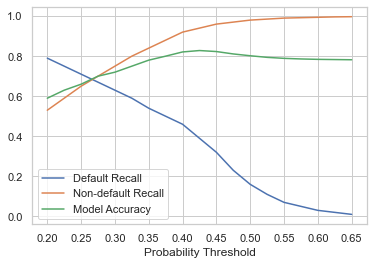

In [51]:
thresh = [0.2, 0.225, 0.25, 0.275, 0.3, 0.325, 0.35, 0.375, 0.4,
          0.425, 0.45, 0.475, 0.5, 0.525, 0.55, 0.575, 0.6, 0.625, 0.65]
def_recalls = [0.79, 0.75, 0.71, 0.67, 0.63, 0.59, 0.54, 0.50, 0.46, 
              0.39, 0.32, 0.23, 0.16, 0.11, 0.07, 0.05, 0.03, 0.02, 0.01]
nondef_recalls = [0.53, 0.59, 0.65, 0.70, 0.75, 0.80, 0.84, 0.88, 0.92, 
                  0.94,0.96, 0.97, 0.980, 0.985, 0.990, 0.992, 0.994, 0.996, 0.997]
accs = [0.59, 0.63, 0.66, 0.70, 0.72, 0.75, 0.78, 0.80, 0.821, 0.828, 0.823, 
        0.811, 0.802, 0.794, 0.789, 0.786, 0.784,0.783, 0.782]
ticks = [0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65]

plt.plot(thresh,def_recalls)
plt.plot(thresh,nondef_recalls)
plt.plot(thresh,accs)
plt.xlabel("Probability Threshold")
plt.xticks(ticks)
plt.legend(["Default Recall","Non-default Recall","Model Accuracy"])
plt.show()

**XGBOOST**

In [52]:
# Create a new XGBoost
gbt = xgb.XGBClassifier().fit(X_train, y_train)

# Predict with a model
gbt_preds = gbt.predict_proba(X_test)

# Create dataframes of first ten predictions, and first ten true labels
gbt_preds_df = pd.DataFrame(gbt_preds[:,1][0:10], columns = ['prob_default'])
gbt_true_df = y_test.head(10)

# Concatenate and print the two data frames for comparison
print(pd.concat([gbt_true_df.reset_index(drop = True), gbt_preds_df], axis = 1))

   loan_status  prob_default
0            0      0.375797
1            0      0.016076
2            0      0.084966
3            0      0.092744
4            0      0.024453
5            0      0.121078
6            0      0.042531
7            0      0.228830
8            0      0.004935
9            1      0.616500


In [53]:
# Print the column importances from the model
print(gbt.get_booster().get_score(importance_type = 'weight'))

{'loan_percent_income': 529, 'loan_int_rate': 880, 'person_income': 1230, 'person_emp_length': 499, 'loan_amnt': 443}


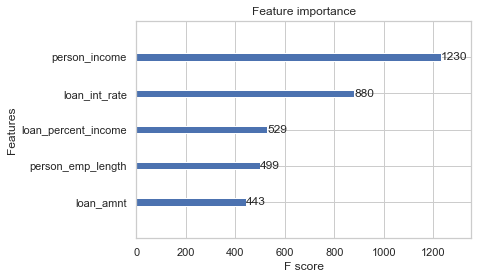

In [54]:
xgb.plot_importance(gbt, importance_type = 'weight')
plt.show()

* **Treshold = 0.5**

In [55]:
# Create a dataframe for the probabilities of default
gbt_preds_df = pd.DataFrame(gbt_preds[:,1], columns = ['prob_default'])

# Reassign loan status based on the threshold
gbt_preds_df['loan_status'] = gbt_preds_df['prob_default'].apply(lambda x: 1 if x > 0.5 else 0)

# Print the confusion matrix
print('\n' + '\033[1m' + ' Confusion Matrix '.center(60,'-') + '\033[0m' + '\n')
print(confusion_matrix(y_test, gbt_preds_df['loan_status']))

# Print the classification report
target_names = ['Non-Default', 'Default']
print('\n' + '\033[1m' + ' Classification Report '.center(60,'-') + '\033[0m' + '\n')
print(classification_report(y_test, gbt_preds_df['loan_status'], target_names=target_names))


--------------------- Confusion Matrix ---------------------

[[7158  461]
 [ 765 1389]]

------------------ Classification Report -------------------

              precision    recall  f1-score   support

 Non-Default       0.90      0.94      0.92      7619
     Default       0.75      0.64      0.69      2154

    accuracy                           0.87      9773
   macro avg       0.83      0.79      0.81      9773
weighted avg       0.87      0.87      0.87      9773



* **Treshold = 0.4**

In [56]:
# Create a dataframe for the probabilities of default
gbt_preds_df = pd.DataFrame(gbt_preds[:,1], columns = ['prob_default'])

# Reassign loan status based on the threshold
gbt_preds_df['loan_status'] = gbt_preds_df['prob_default'].apply(lambda x: 1 if x > 0.4 else 0)

## Print the confusion matrix
print('\n' + '\033[1m' + ' Confusion Matrix '.center(60,'-') + '\033[0m' + '\n')
print(confusion_matrix(y_test, gbt_preds_df['loan_status']))

# Print the classification report
target_names = ['Non-Default', 'Default']
print('\n' + '\033[1m' + ' Classification Report '.center(60,'-') + '\033[0m' + '\n')
print(classification_report(y_test, gbt_preds_df['loan_status'], target_names=target_names))


--------------------- Confusion Matrix ---------------------

[[7023  596]
 [ 642 1512]]

------------------ Classification Report -------------------

              precision    recall  f1-score   support

 Non-Default       0.92      0.92      0.92      7619
     Default       0.72      0.70      0.71      2154

    accuracy                           0.87      9773
   macro avg       0.82      0.81      0.81      9773
weighted avg       0.87      0.87      0.87      9773



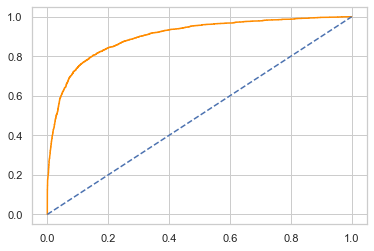

Accuracy Score: 0.8745523380742863
AUC Score: 0.9013788404422652


In [57]:
# Plot the ROC curve of the probabilities of default
gbt_prob_default = gbt_preds[:,1]
fallout, sensitivity, thresholds = roc_curve(y_test, gbt_prob_default)
plt.plot(fallout, sensitivity, color = 'darkorange')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.show()

# Print the accuracy score the model
gbt_acc_score = gbt.score(X_test, y_test)
print('Accuracy Score: ' + str(gbt_acc_score))

# Compute the AUC and store it in a variable
gbt_auc_score = roc_auc_score(y_test, gbt_prob_default)
print('AUC Score: ' + str(gbt_auc_score))

**C. Score Comparison**

In [58]:
compare2 = pd.DataFrame([lr_acc_score, gbt_acc_score, lr_auc_score, gbt_auc_score]).transpose()
compare2.rename(columns={0 : 'lr_acc_score', 1 : 'gbt_acc_score', 2: 'lr_auc_score', 
                         3 :'gbt_auc_score'})

,lr_acc_score,gbt_acc_score,lr_auc_score,gbt_auc_score
0,0.802108,0.874552,0.756395,0.901379


**2. Cross Validation**
<a id="cross_validation" > </a>

**A. Logisitc Regression - Cross Validation**

In [59]:
scores = cross_val_score(log_reg, X_train, y_train, cv=10)
print('Cross-Validation Accuracy Scores', scores)

Cross-Validation Accuracy Scores [0.81367821 0.80219298 0.80657895 0.80087719 0.79912281 0.81447368
 0.82061404 0.81052632 0.80921053 0.80921053]


In [60]:
scores = pd.Series(scores)
scores.min(), scores.mean(), scores.max()

(0.7991228070175439, 0.8086485228854687, 0.8206140350877194)

**B. XGBoost - Cross Validation**

In [61]:
# Set parameter
params = {'objective': 'binary:logistic', 'seed': 123, 'eval_metric': 'auc'}

# Set the values for number of folds and stopping iterations
n_folds = 5
early_stopping = 10

# Create the DTrain matrix for XGBoost
DTrain = xgb.DMatrix(X_train, label = y_train)

# Create the data frame of cross validations
cv_df = xgb.cv(params, DTrain, num_boost_round = 100, nfold=n_folds,
            early_stopping_rounds=early_stopping)

# Print the cross validations data frame
print(cv_df[:10])

   train-auc-mean  train-auc-std  test-auc-mean  test-auc-std
0        0.880458       0.001840       0.873056      0.006843
1        0.888024       0.002274       0.880204      0.006839
2        0.890962       0.002305       0.883168      0.007267
3        0.892705       0.001893       0.884017      0.007879
4        0.895325       0.002007       0.886104      0.007219
5        0.897359       0.002219       0.886909      0.007133
6        0.899890       0.002009       0.888087      0.006675
7        0.903071       0.002913       0.889345      0.006059
8        0.905549       0.002254       0.890574      0.006469
9        0.907999       0.002149       0.891853      0.006219


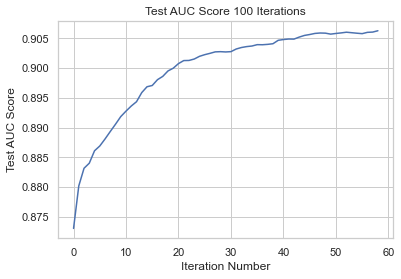

In [62]:
# Plot the test AUC scores for each iteration
plt.plot(cv_df['test-auc-mean'])
plt.title('Test AUC Score 100 Iterations')
plt.xlabel('Iteration Number')
plt.ylabel('Test AUC Score')
plt.show()

**Kesimpulan:**

**train-auc-mean** dan **test-auc-mean** meningkat pada setiap iterasi cross-validation. 

**3. Hyper-Parameter Tuning**
<a id="hyper_parameter_tuning" > </a>

**A. Logistic Regression - Hyper-Parameter Tuning**

In [63]:
penalty = ['l1', 'l2', 'elasticnet', 'none']
solver = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
max_iter = [1, 10, 100, 1000, 10000]

params = {'penalty': penalty, 'solver': solver, 'max_iter': max_iter}
params

{'penalty': ['l1', 'l2', 'elasticnet', 'none'],
 'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
 'max_iter': [1, 10, 100, 1000, 10000]}

In [64]:
model_lr = LogisticRegression()
model_lr_gs = GridSearchCV(model_lr, params, cv = 5)

In [65]:
model_lr_gs.fit(X_train, y_train)
model_lr_gs.best_params_

{'max_iter': 100, 'penalty': 'l2', 'solver': 'newton-cg'}

In [66]:
# Create and train a new logistic regression
log_reg_hyper = LogisticRegression(max_iter=1000, penalty='l2', solver='newton-cg').fit(X_train, y_train)

# Print the intercept of the model
print(log_reg_hyper.intercept_)

# Print the coeficient of the model
print(log_reg_hyper.coef_)

[-6.03653221]
[[ 1.09052214e+01 -1.85325864e-06  3.10069397e-01 -7.79555323e-05
  -2.50145290e-02]]


In [67]:
# Create predictions of probability for loan status using test data
lr_preds_hyper = log_reg_hyper.predict_proba(X_test)

# Create dataframes of first ten predictions, and first ten true labels
lr_preds_df_hyper = pd.DataFrame(lr_preds_hyper[:,1][:10], columns = ['prob_default'])
lr_true_df_hyper = y_test.head(10)

# Concatenate and print the two data frames for comparison
print(pd.concat([lr_true_df_hyper.reset_index(drop = True), lr_preds_df_hyper], axis = 1))

   loan_status  prob_default
0            0      0.275231
1            0      0.060116
2            0      0.183292
3            0      0.272013
4            0      0.052242
5            0      0.608369
6            0      0.088503
7            0      0.115451
8            0      0.032812
9            1      0.567121


In [68]:
# Create a dataframe for the probabilities of default
lr_preds_df_hyper = pd.DataFrame(lr_preds_hyper[:,1], columns = ['prob_default'])

# Reassign loan status based on the threshold
lr_preds_df_hyper['loan_status'] = lr_preds_df_hyper['prob_default'].apply(lambda x: 1 if x > 0.4 else 0)

# Print the confusion_matrix
print('\n' + '\033[1m' + ' Confusion Matrix '.center(60,'-') + '\033[0m' + '\n')
print(confusion_matrix(y_test, lr_preds_df_hyper['loan_status']))

# Print the classification report
target_names = ['Non-Default', 'Default']
print('\n' + '\033[1m' + ' Classification Report '.center(60,'-') + '\033[0m' + '\n')
print(classification_report(y_test, lr_preds_df_hyper['loan_status'], target_names=target_names))


--------------------- Confusion Matrix ---------------------

[[6921  698]
 [1029 1125]]

------------------ Classification Report -------------------

              precision    recall  f1-score   support

 Non-Default       0.87      0.91      0.89      7619
     Default       0.62      0.52      0.57      2154

    accuracy                           0.82      9773
   macro avg       0.74      0.72      0.73      9773
weighted avg       0.81      0.82      0.82      9773



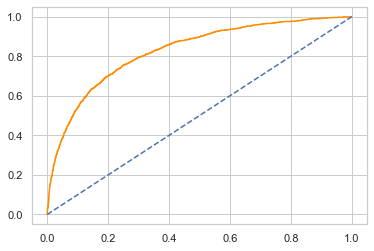

Accuracy Score: 0.8745523380742863
AUC Score: 0.8267643028966702


In [69]:
# Plot the ROC curve of the probabilities of default
lr_prob_default_hyper = lr_preds_hyper[:,1]
fallout, sensitivity, thresholds = roc_curve(y_test, lr_prob_default_hyper)
plt.plot(fallout, sensitivity, color = 'darkorange')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.show()

# Print the accuracy score the model
lr_acc_score_hyper = gbt.score(X_test, y_test)
print('Accuracy Score: ' + str(lr_acc_score_hyper))

# Compute the AUC and store it in a variable
lr_auc_score_hyper = roc_auc_score(y_test, lr_prob_default_hyper)
print('AUC Score: ' + str(lr_auc_score_hyper))

**Kesimpulan:**

Ada peningkatan performa model machine learning setelah hyper-parameter tuning

**B. XGBoost - Hyper-Parameter Tuning**

In [91]:
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 2.5],
        'subsample': [0.2, 0.4, 0.6, 0.8, 1.0],
        'colsample_bytree': [0.2, 0.4, 0.6, 0.8, 1.0],
        'max_depth': [1, 2, 3, 4, 5]
        }

In [92]:
model_gbt = xgb.XGBClassifier()
model_gbt_gs = GridSearchCV(model_gbt, params, cv = 10)

In [ ]:
model_gbt_gs.fit(X_train, y_train)
model_gbt_gs.best_params_

In [88]:
# Create and train a new XGBoost
gbt_hyper = xgb.XGBClassifier(subsample = 0.6, min_child_weight = 5, max_depth = 5, gamma = 2, 
                              colsample_bytree = 1.0).fit(X_train, y_train)

# Create predictions of probability for loan status using test data
gbt_preds_hyper = gbt_hyper.predict_proba(X_test)

# Create dataframes of first ten predictions, and first ten true labels
gbt_preds_df_hyper = pd.DataFrame(gbt_preds_hyper[:,1][:10], columns = ['prob_default'])
gbt_true_df_hyper = y_test.head(10)

# Concatenate and print the two data frames for comparison
print(pd.concat([gbt_true_df_hyper.reset_index(drop = True), gbt_preds_df_hyper], axis = 1))

   loan_status  prob_default
0            0      0.333174
1            0      0.062497
2            0      0.084800
3            0      0.137166
4            0      0.025872
5            0      0.075379
6            0      0.037061
7            0      0.234815
8            0      0.004572
9            1      0.544276


In [89]:
# Create a dataframe for the probabilities of default
gbt_preds_df_hyper = pd.DataFrame(gbt_preds_hyper[:,1], columns = ['prob_default'])

# Reassign loan status based on the threshold
gbt_preds_df_hyper['loan_status'] = gbt_preds_df_hyper['prob_default'].apply(lambda x: 1 if x > 0.4 else 0)

# Print the confusion_matrix
print('\n' + '\033[1m' + ' Confusion Matrix '.center(60,'-') + '\033[0m' + '\n')
print(confusion_matrix(y_test, gbt_preds_df_hyper['loan_status']))

# Print the classification report
target_names = ['Non-Default', 'Default']
print('\n' + '\033[1m' + ' Classification Report '.center(60,'-') + '\033[0m' + '\n')
print(classification_report(y_test, gbt_preds_df_hyper['loan_status'], target_names=target_names))


--------------------- Confusion Matrix ---------------------

[[7010  609]
 [ 673 1481]]

------------------ Classification Report -------------------

              precision    recall  f1-score   support

 Non-Default       0.91      0.92      0.92      7619
     Default       0.71      0.69      0.70      2154

    accuracy                           0.87      9773
   macro avg       0.81      0.80      0.81      9773
weighted avg       0.87      0.87      0.87      9773



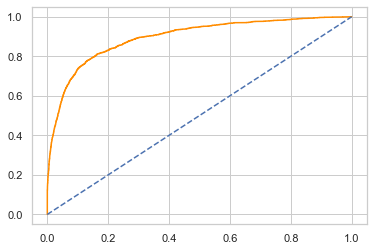

Accuracy Score: 0.8745523380742863
AUC Score: 0.8947521364209082


In [90]:
# Plot the ROC curve of the probabilities of default
gbt_prob_default_hyper = gbt_preds_hyper[:,1]
fallout, sensitivity, thresholds = roc_curve(y_test, gbt_prob_default_hyper)
plt.plot(fallout, sensitivity, color = 'darkorange')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.show()

# Print the accuracy score the model
gbt_acc_score_hyper = gbt.score(X_test, y_test)
print('Accuracy Score: ' + str(gbt_acc_score_hyper))

# Compute the AUC and store it in a variable
gbt_auc_score_hyper = roc_auc_score(y_test, gbt_prob_default_hyper)
print('AUC Score: ' + str(gbt_auc_score_hyper))

**Kesimpulan:**

Ada sedikit peningkatan performa model machine learning setelah hyper-parameter tuning.

### MODEL EVALUATION & IMPLEMENTATION
<a id="#5" > </a>

**1. Comparing Model Report**
<a id="comparing_model_report" > </a>

In [76]:
# Print the logistic regression classification report
print('\n' + '\033[1m' + ' Logistic Regression '.center(60,'-') + '\033[0m' + '\n')
target_names = ['Non-Default', 'Default']
print(classification_report(y_test, lr_preds_df_hyper['loan_status'], target_names=target_names))

# Print the gradient boosted tree classification report
print('\n' + '\033[1m' + ' XGBoost '.center(60,'-') + '\033[0m' + '\n')
print(classification_report(y_test, gbt_preds_df_hyper['loan_status'], target_names=target_names))


------------------- Logistic Regression --------------------

              precision    recall  f1-score   support

 Non-Default       0.87      0.91      0.89      7619
     Default       0.62      0.52      0.57      2154

    accuracy                           0.82      9773
   macro avg       0.74      0.72      0.73      9773
weighted avg       0.81      0.82      0.82      9773


------------------------- XGBoost --------------------------

              precision    recall  f1-score   support

 Non-Default       0.91      0.92      0.92      7619
     Default       0.72      0.69      0.71      2154

    accuracy                           0.87      9773
   macro avg       0.82      0.81      0.81      9773
weighted avg       0.87      0.87      0.87      9773



**2. Comparing with ROC**
<a id="comparing_with_roc" > </a>

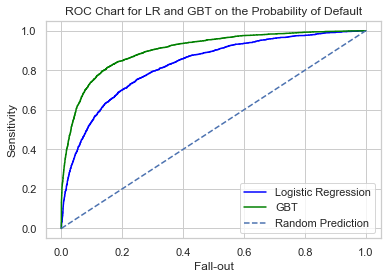

In [77]:
# ROC chart components
fallout_lr, sensitivity_lr, thresholds_lr = roc_curve(y_test, lr_preds_hyper[:,1])
fallout_gbt, sensitivity_gbt, thresholds_gbt = roc_curve(y_test, gbt_preds_hyper[:,1])

# ROC Chart with both
plt.plot(fallout_lr, sensitivity_lr, color = 'blue', label='%s' % 'Logistic Regression')
plt.plot(fallout_gbt, sensitivity_gbt, color = 'green', label='%s' % 'GBT')
plt.plot([0, 1], [0, 1], linestyle='--', label='%s' % 'Random Prediction')
plt.title("ROC Chart for LR and GBT on the Probability of Default")
plt.xlabel('Fall-out')
plt.ylabel('Sensitivity')
plt.legend()
plt.show()

**3. Acceptance Rates**
<a id="acceptance_rates" > </a>

Menentukan presentase penerimaan pinjaman baru (accepted loan).

In [78]:
# Check the statistics of the probabilities of default
print(gbt_preds_df_hyper['prob_default'].describe())
print('\n')

# Calculate the threshold for a 85% acceptance rate
threshold_85 = np.quantile(gbt_preds_df_hyper['prob_default'], 0.85)

# Apply acceptance rate threshold
gbt_preds_df_hyper['loan_status_accepted'] = gbt_preds_df_hyper['prob_default'].apply(lambda x: 1 if x > threshold_85 else 0)

# Print the total loan accepted
print('Total loan received is')
print(sum(gbt_preds_df_hyper['loan_status_accepted'].value_counts()))
print('\n')

# Print the counts of loan status accepted
print('loan status')
print(gbt_preds_df_hyper['loan_status_accepted'].value_counts())

count    9773.000000
mean        0.221602
std         0.289740
min         0.000475
25%         0.025211
50%         0.075963
75%         0.300950
max         0.999714
Name: prob_default, dtype: float64


Total loan received is
9773


loan status
0    8307
1    1466
Name: loan_status_accepted, dtype: int64


**Kesimpulan:**

Dari seluruh total pinjaman yang diterima ada 8307 yang statusnya non-default dan 1466 default.

**Visualizing Acceptance Rates**

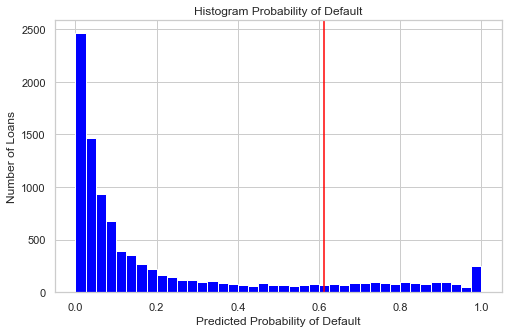

In [79]:
# Plot the predicted probabilities of default
plt.figure(figsize=(8,5))
plt.hist(gbt_preds_df_hyper['prob_default'], color = 'blue', bins = 40)
plt.title('Histogram Probability of Default')
plt.xlabel('Predicted Probability of Default')
plt.ylabel('Number of Loans')

# Calculate the threshold with quantile
threshold = np.quantile(gbt_preds_df_hyper['prob_default'], 0.85)

# Add a reference line to the plot for the threshold
plt.axvline(x = threshold, color = 'red')
plt.show()

**Keterangan:**
  
* Sisi kiri dari garis merah adalah pinjaman yang diterima
* Sisi kanan dari garis merah adalah pinjaman yang ditolak

Dari visualisasi diatas dapat diketahui jumlah pinjaman yang ditolak dan diterima berdasarkan treshold tertentu.

**4. Bad Rates**
<a id="bad_rates" > </a>

Menghitung persentase pinjaman **default** dari seluruh pinjaman yang diterima.

* **Rumus:**

    Bad Rate = Accepted Default / Total Accepted Loans

In [80]:
# Create a subset of only accepted loans
num_of_default = gbt_preds_df_hyper[gbt_preds_df_hyper['loan_status_accepted'] == 1]['loan_status_accepted'].sum()
num_of_accepted_loan = gbt_preds_df_hyper['loan_status_accepted'].value_counts().sum()

# Calculate the bad rate
bad_rate = np.sum(num_of_default / num_of_accepted_loan).round(2)
bad_rate

0.15

**Kesimpulan:**
    
Total persentase dari seluruh pinjaman yang diterima ada 15% yang default

**5. Expected Loss**
<a id="expected_loss" > </a>

**Rumus:** 


Expected Loss = PD x LGD x EAD

In [84]:
# LGD = Berdasarkan rata-rata total loan amount
gbt_preds_df_hyper['loss_given_default'] = X_test['loan_amnt'].copy().mean()

# EAD = Asumsi bahwa setiap pinjaman yang default akan loss 100%
EAD = [1.0] * 9773
gbt_preds_df_hyper['exposure_at_default'] = EAD

In [87]:
# Calculate the bank's expected loss and assign it to a new column
gbt_preds_df_hyper['expected_loss'] = gbt_preds_df_hyper['prob_default'] * gbt_preds_df_hyper['loss_given_default'] * gbt_preds_df_hyper['exposure_at_default']

# Calculate the total expected loss to two decimal places
tot_exp_loss = round(np.sum(gbt_preds_df_hyper['expected_loss']),2)

# Print the total expected loss
print('Total expected loss: ', '${:,.2f}'.format(tot_exp_loss))

Total expected loss:  $20,770,867.13
